<h1 align="center">VAE Model Metrics Analysis</h1>

## Methodology

This notebook presents a systematic approach to evaluating the performance of different Variational Autoencoder (VAE) models trained on the MNIST dataset. Our objective is to determine the optimal latent space dimension that provides the best balance between reconstruction accuracy and model complexity.

The methodology encompassed the following steps:

1. **Model Training:** Multiple VAE models were trained with varying sizes of the latent space dimensions: 5, 10, 15, and 20.

2. **Image Reconstruction:** For each trained model, a set of test images from the MNIST dataset was reconstructed. This set included 10 images for each digit, totaling 100 images per model.

3. **Performance Metrics Calculation:** I computed two primary metrics for assessing reconstruction quality:
   - Mean Squared Error (MSE)
   - Peak Signal-to-Noise Ratio (PSNR)

4. **Results Aggregation:** The calculated metrics for each digit and latent dimension were aggregated for comparative analysis.

5. **Data Visualization:** I visualized the results using scatter plots to illustrate the performance trends across different latent dimensions and digits.

6. **Interpretation and Conclusion:** Based on the observed trends in MSE and PSNR, I interpreted the results to select the most appropriate latent dimension for our VAE model.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = []
latent_dims = [5, 10, 15, 20]

# A color palette with 10 colors for the digits 0-9
palette = sns.color_palette("tab10", n_colors=10)

for dim in latent_dims:
    df = pd.read_csv(f'/Volumes/D/GitHub-Portfolio/DeepLearning-MNIST-VAE/data/metrics_by_digit_latent_dim_{dim}.csv')
    df['latent_dim'] = dim
    results.append(df)

results_df = pd.concat(results)

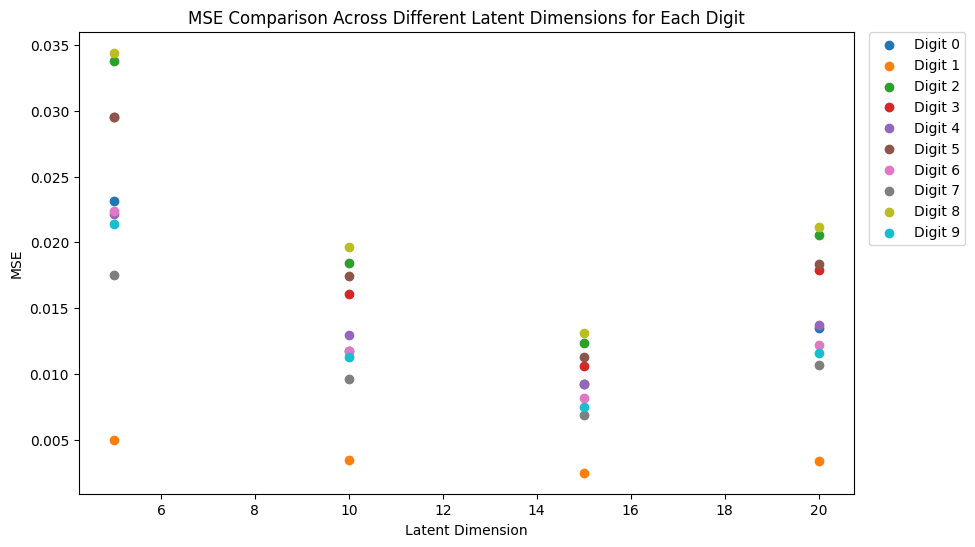

In [6]:
# Plot for MSE for each digit
plt.figure(figsize=(10, 6))
for digit in range(10):
    subset = results_df[results_df['digit'] == digit]
    #plt.scatter(subset['latent_dim'], subset['mse_vae'], label=f'Digit {digit} - VAE', color=palette[digit])
    plt.scatter(subset['latent_dim'], subset['mse_decoder'], label=f'Digit {digit}', color=palette[digit], marker='o')

plt.xlabel('Latent Dimension')
plt.ylabel('MSE')
plt.title('MSE Comparison Across Different Latent Dimensions for Each Digit')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)  
plt.show()

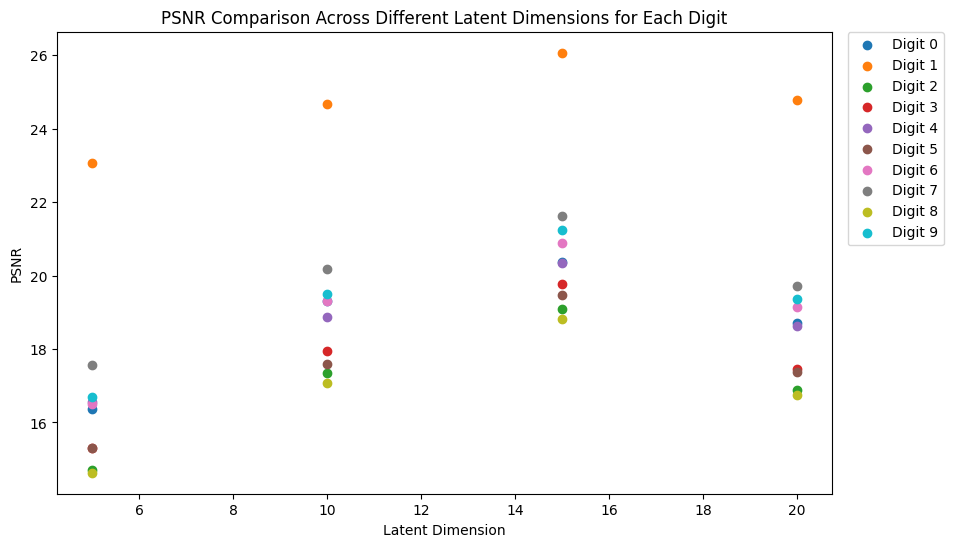

In [7]:
# Plot for PSNR for each digit
plt.figure(figsize=(10, 6))
for digit in range(10):
    subset = results_df[results_df['digit'] == digit]
    #plt.scatter(subset['latent_dim'], subset['psnr_vae'], label=f'Digit {digit} - VAE', color=palette[digit])
    plt.scatter(subset['latent_dim'], subset['psnr_decoder'], label=f'Digit {digit}', color=palette[digit], marker='o')

plt.xlabel('Latent Dimension')
plt.ylabel('PSNR')
plt.title('PSNR Comparison Across Different Latent Dimensions for Each Digit')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)  
plt.show()